In [17]:
import matplotlib as matplotlib

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.pylab import rcParams

rcParams['figure.figsize']=20,10

import tensorflow as tf  

from tensorflow import keras

from datetime import date, datetime

from keras.models import Sequential

import holidays

from keras.layers import LSTM,Dropout,Dense

from sklearn.preprocessing import MinMaxScaler

In [18]:
def parse(x):
	return datetime.strptime(x, "%m/%d/%Y")
#Read csv and set parser to data 
df = pd.read_csv('D:\\source\\DataScience\\Cap_Plan_Hackathon_data.csv', index_col=0, date_parser=parse)
data_size=len(df)
train_size = data_size-90
print(data_size)
# manually specify column names
df.columns = ['No_calls_Offered']
df.index.name = 'Date'

df = df.astype({"No_calls_Offered": int})
df.dtypes



1673


No_calls_Offered    int32
dtype: object

In [19]:
#find out a date is a holiday or weekend
us_holidays = holidays.US()
def is_holiday_weekend(date):
    in_dt = date.strftime("%d-%m-%Y")
    is_holi = 0;
    if(in_dt in us_holidays or df["WeekDay"][i]==6 or df["WeekDay"][i]==5):
        is_holi = 1
    else:
        is_holi = 0
    return is_holi
        

In [20]:
#findout the weekdays to identify weekends as holiday
df["WeekDay"]=df.index.weekday.astype('int')

is_holiday = []
for i in df.index:
    is_holiday.append(is_holiday_weekend(i))
    df["Day"] = i.day
    df["Month"] = i.month
    df["Year"] = i.year
    
df["Holiday"]=is_holiday
df = df.astype({"Holiday": int})
print(df["Holiday"])

Date
2017-01-01    1
2017-01-02    0
2017-01-03    0
2017-01-04    0
2017-01-05    0
             ..
2021-07-27    0
2021-07-28    0
2021-07-29    0
2021-07-30    0
2021-07-31    1
Name: Holiday, Length: 1673, dtype: int32


In [21]:
#plt.plot(df["Close"],label='Close Price history')

In [22]:
df = df.sort_index(ascending=True,axis=0)


In [23]:
#Identify the season

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)
indx = 0
season = []
for i in df.index:
    season.append(get_season(i))
    
df["season"] = season

In [24]:
print(df.head())

            No_calls_Offered  WeekDay  Day  Month  Year  Holiday  season
Date                                                                    
2017-01-01               264        6   31      7  2021        1  winter
2017-01-02               528        0   31      7  2021        0  winter
2017-01-03              2505        1   31      7  2021        0  winter
2017-01-04              2145        2   31      7  2021        0  winter
2017-01-05              2164        3   31      7  2021        0  winter


In [25]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.066105   1.000000        0.0        0.0        0.0        1.0   
2   0.151653   0.000000        0.0        0.0        0.0        0.0   
3   0.792288   0.166667        0.0        0.0        0.0        0.0   
4   0.675632   0.333333        0.0        0.0        0.0        0.0   
5   0.681789   0.500000        0.0        0.0        0.0        0.0   

   var7(t-1)   var1(t)  
1        1.0  0.151653  
2        1.0  0.792288  
3        1.0  0.675632  
4        1.0  0.681789  
5        1.0  0.559624  
(1583, 1, 7) (1583,) (89, 1, 7) (89,)
Epoch 1/50
22/22 - 3s - loss: 0.3256 - val_loss: 0.1891 - 3s/epoch - 136ms/step
Epoch 2/50
22/22 - 0s - loss: 0.2608 - val_loss: 0.1423 - 98ms/epoch - 4ms/step
Epoch 3/50
22/22 - 0s - loss: 0.2215 - val_loss: 0.1452 - 116ms/epoch - 5ms/step
Epoch 4/50
22/22 - 0s - loss: 0.1965 - val_loss: 0.1446 - 117ms/epoch - 5ms/step
Epoch 5/50
22/22 - 0s - loss: 0.1854 - val_loss: 0.1369 - 102ms

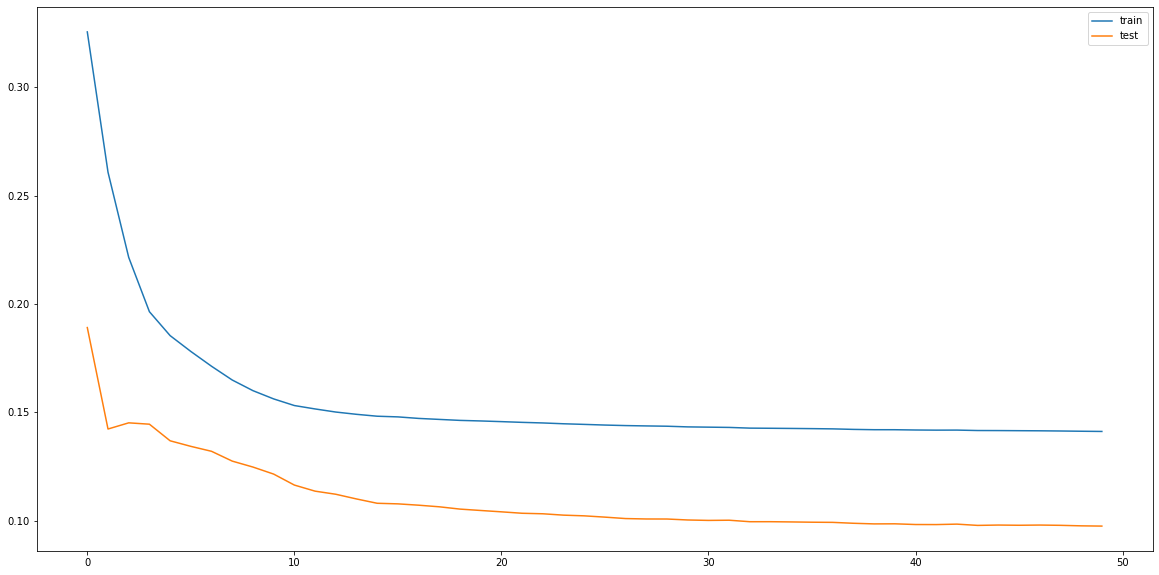

Test RMSE: 423.736


In [26]:
values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:,6] = encoder.fit_transform(values[:,6])
# ensure all data is int
values = values.astype('int')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = train_size
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

#from tensorflow.keras.optimizers import RMSprop
model.compile(loss='mae', optimizer='adam')
# fit network
#print(train_X)
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
#print(test_X)
# make a prediction
yhat = model.predict(test_X)
#yhat = np.argmax(yhat)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
#print(test_X[:, 1:])
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

[1297. 1238. 1104. 1104.  261.  189. 1299. 1189. 1161. 1093.  959.  274.
  220. 1288. 1287. 1173. 1107. 1065.  355.  196. 1353. 1360. 1225. 1161.
 1007.  302.  211.  206. 1586. 1333. 1310. 1145.  314.  204. 1389. 1277.
 1224. 1187. 1002.  261.  234. 1234. 1664. 1717. 1123. 1039.  295.  217.
 1426. 1417. 1292. 1191. 1181.  352.  255. 1581. 1463. 1426. 1415. 1027.
  250.  168.  270. 1433. 1293. 1210. 1152.  277.  262. 1427. 1441. 1353.
 1320. 1105.  254.  241. 1375. 1361. 1312. 1217. 1148.  306.  262. 1378.
 1347. 1374. 1317. 1185.  345.]
[1509.12524313 1242.81654716 1102.31080979  896.52157098 1083.71834522
  516.17922109  464.39921004 1332.1221441  1149.01509035 1035.74074048
  887.12913811  682.75237405  524.34403884  483.61725432 1322.53252763
 1234.0885973  1046.0801881   899.08514184  772.10220855  575.53985667
  468.73159328 1379.34614694 1298.00183821 1091.03409624  945.3726145
  723.07780164  541.97872818  478.02934307  519.93582636 1498.72950989
 1185.17446238 1074.48860723  84

C:\Users\MBHASK~1\AppData\Local\Temp/ipykernel_10120/1133718274.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=inv_yhat


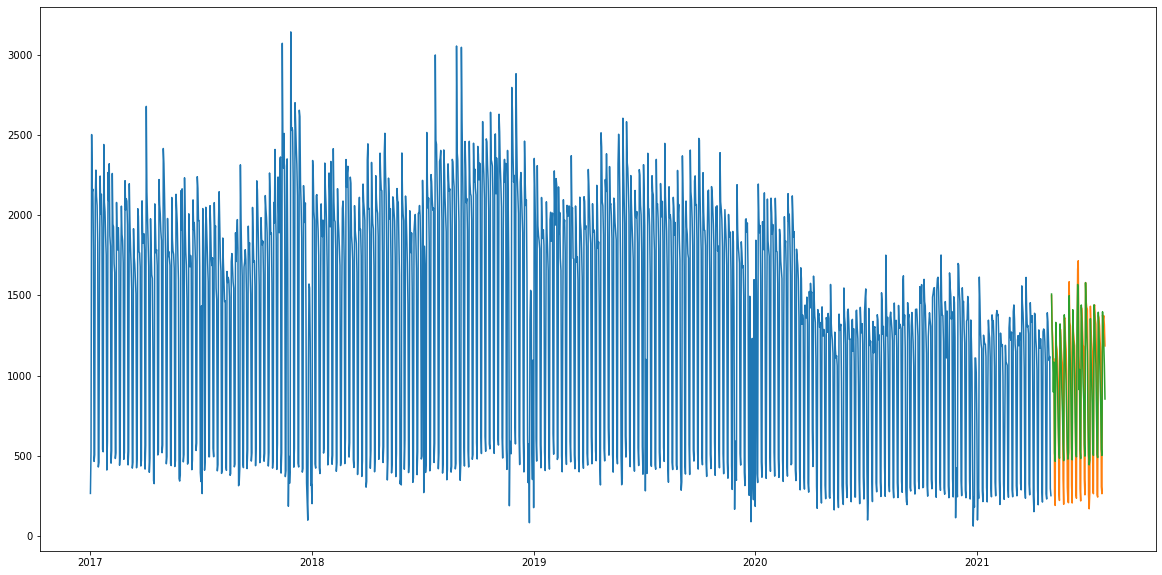

In [27]:
print(inv_y)
train_data=df[:train_size]
valid_data=df[train_size:data_size-1]
print(inv_yhat)
valid_data['Predictions']=inv_yhat
plt.plot(train_data["No_calls_Offered"])
plt.plot(valid_data[['No_calls_Offered',"Predictions"]])